In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pickle
import pandas as pd
from scipy.ndimage import label


In [2]:
filename = '/home/cr2/cmtorres/ERA5/T2_daily_anomalies.nc'
T2_an = xr.open_dataset(filename)
filename = '/home/cr2/cmtorres/ERA5/Z500_daily_anomalies.nc'
Z500_an = xr.open_dataset(filename)/9.98

filename = '/home/cr2/cmtorres/ERA5/V10_daily_anomalies.nc'
V10_an = xr.open_dataset(filename)

filename = '/home/cr2/cmtorres/ERA5/U10_daily_anomalies.nc'
U10_an = xr.open_dataset(filename)

filename = '/home/cr2/cmtorres/ERA5/precip_daily_sum.nc'
PRECIP = xr.open_dataset(filename)*1000

filename = '/home/cr2/cmtorres/ERA5/IVTu_12UTC.nc'
IVTu = xr.open_dataset(filename)
IVTu['time'] = ('time', IVTu['time'].dt.floor('D').data)

filename = '/home/cr2/cmtorres/ERA5/IVTv_12UTC.nc'
IVTv = xr.open_dataset(filename)
IVTv['time'] = ('time', IVTv['time'].dt.floor('D').data)

filename = '/home/cr2/cmtorres/ERA5/MSLP_daily_anomalies.nc'
mslp_an = xr.open_dataset(filename)/100
mslp_an

<xarray.Dataset> Size: 3GB
Dimensions:      (latitude: 221, longitude: 501, time: 6806)
Coordinates:
  * latitude     (latitude) float64 2kB -20.0 -20.25 -20.5 ... -74.75 -75.0
  * longitude    (longitude) float64 4kB -135.0 -134.8 -134.5 ... -10.25 -10.0
  * time         (time) datetime64[ns] 54kB 1979-01-01 1979-01-02 ... 2023-12-31
    number       (time) int64 54kB ...
    dayofyear    (time) int64 54kB ...
Data variables:
    msl_anomaly  (time, latitude, longitude) float32 3GB 1.43 1.452 ... -14.87

In [3]:
filename = 'data/HW_ARs_days_SSI_new.csv'
HWs_ARS_KJS = pd.read_csv(filename, sep= '\t')
HWs_ARS_KJS['date'] = pd.to_datetime(HWs_ARS_KJS['date'])
HWs_ARS_KJS


,date,temperature,p90_har,heatwave,label
0,1996-02-16,4.8,3.260798,True,1
1,1996-02-17,3.7,3.253920,True,1
2,1996-02-18,5.3,3.246030,True,1
3,1996-02-19,5.6,3.237139,True,1
4,1996-02-20,3.4,3.227258,True,1
5,1997-01-20,5.0,3.053530,True,15
6,1997-01-21,4.2,3.074079,True,15
7,1997-01-22,5.1,3.093747,True,15
8,1997-01-23,4.0,3.112514,True,15
9,1997-01-24,5.0,3.130362,True,15


In [4]:
filename = '/home/cr2/cmtorres/DATA/KSJ_AWS/KSJ_met_daily_1996_2020.csv'
df = pd.read_csv(filename, sep='\t')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.rename(columns={'Timestamp':'date'}, inplace=True)

In [5]:
HWs_ARs_KJS_sel = pd.merge(HWs_ARS_KJS, df, how="left", on="date")
HWs_ARs_KJS_sel

,date,temperature,p90_har,heatwave,label,WS(m/s),WDv(deg),Ta(C),RH(%),Prs(hPa),Prcp(mm),Snow(cm),Rsw(W/m2)
0,1996-02-16,4.8,3.260798,True,1,12.1,3.2,4.8,92.8,991.1,22.0,0.0,70.6
1,1996-02-17,3.7,3.253920,True,1,9.9,343.6,3.7,92.6,985.1,2.2,0.0,92.4
2,1996-02-18,5.3,3.246030,True,1,9.6,7.6,5.3,90.1,989.7,9.7,0.0,98.3
3,1996-02-19,5.6,3.237139,True,1,9.8,7.3,5.6,90.5,972.9,4.2,0.0,76.9
4,1996-02-20,3.4,3.227258,True,1,8.3,343.5,3.4,91.0,975.3,0.0,0.0,92.2
5,1997-01-20,5.0,3.053530,True,15,7.2,5.7,5.0,90.1,992.4,1.4,0.0,136.6
6,1997-01-21,4.2,3.074079,True,15,14.0,351.8,4.2,91.2,982.9,4.2,0.0,90.3
7,1997-01-22,5.1,3.093747,True,15,8.0,358.3,5.1,90.3,988.8,1.0,0.0,112.1
8,1997-01-23,4.0,3.112514,True,15,10.1,340.3,4.0,91.8,995.5,0.0,0.0,245.7
9,1997-01-24,5.0,3.130362,True,15,4.3,339.7,5.0,90.2,989.7,0.0,0.0,284.8


In [27]:
events = HWs_ARs_KJS_sel.label.drop_duplicates().reset_index(drop=True)

for i in events:
    print(i)

1
15
41
44
58
74
77


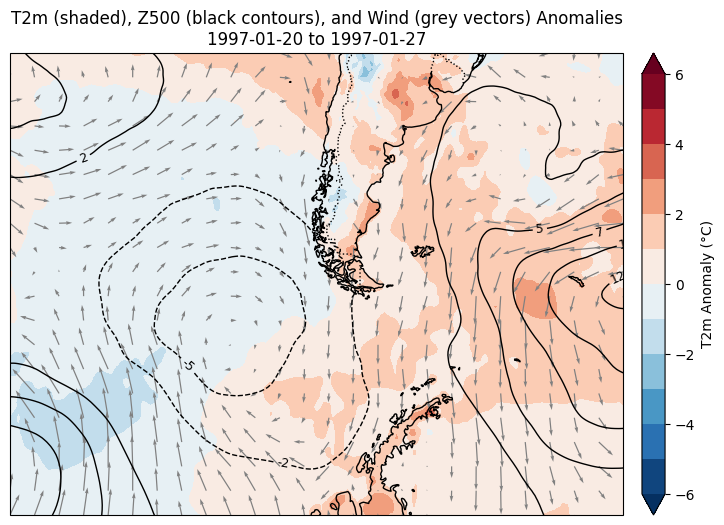

In [ ]:
time_range = HWs_ARS_KJS[HWs_ARS_KJS['label']==events[1]].date.to_list()

date_start = pd.to_datetime(min(time_range)).strftime('%Y-%m-%d')
date_end = pd.to_datetime(max(time_range)).strftime('%Y-%m-%d')

#time_range = HWs_ARS_KJS['date'].to_list()

t2m_anom = T2_an.sel(time=time_range).mean('time').t2m_anomaly
mslp_anom = mslp_an.sel(time=time_range).mean('time').msl_anomaly
u_anom = U10_an.sel(time=time_range).mean('time').u10_anomaly  # U wind anomaly (e.g., at 500 hPa)
v_anom = V10_an.sel(time=time_range).mean('time').v10_anomaly  # V wind anomaly

# --- Define Mercator projection ---
proj = ccrs.Mercator()

# --- Create figure and axes with Mercator projection ---
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': proj})

# --- Add geographic features ---
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optional: Set geographical extent (adjust as needed)
ax.set_extent([-120, -30, -70, -30], crs=ccrs.PlateCarree())

# --- Plot T2m anomalies as shaded contours ---
levels_t2m = np.arange(-6, 7, 1)
cmap = plt.get_cmap("RdBu_r")
t2m_plot = ax.contourf(
    mslp_anom.longitude, mslp_anom.latitude, t2m_anom,
    levels=levels_t2m,
    cmap=cmap,
    extend='both',
    transform=ccrs.PlateCarree()
)
cbar = plt.colorbar(t2m_plot, ax=ax, orientation='vertical', pad=0.02, label="T2m Anomaly (°C)")

# --- Plot Z500 anomalies as black contours (dashed for negative, no zero line) ---
levels_z500 = [lev for lev in np.arange(-40, 41, 2.5) if lev != 0]  # Exclude zero
linestyles = ['dashed' if lev < 0 else 'solid' for lev in levels_z500]
contour = ax.contour(
    mslp_anom.longitude, mslp_anom.latitude, mslp_anom,
    levels=levels_z500,
    colors='black',
    linewidths=1.0,
    linestyles=linestyles,
    transform=ccrs.PlateCarree()
)
ax.clabel(contour, fmt='%d', fontsize=9)

# --- Plot wind vectors ---
# You can thin the grid for better visibility
step = 5
ax.quiver(
    u_anom.longitude[::step], u_anom.latitude[::step],
    u_anom[::step, ::step], v_anom[::step, ::step],
    transform=ccrs.PlateCarree(), scale=100, width=0.0020, regrid_shape=20,
    color='grey'
)

# --- Title and layout ---
ax.set_title(f"T2m (shaded), Z500 (black contours), and Wind (grey vectors) Anomalies\n{date_start} to {date_end}")

fig.savefig(f"fig/T2_{events[1]}.pdf", dpi = 500, facecolor='w', bbox_inches = 'tight', pad_inches = 0.1)

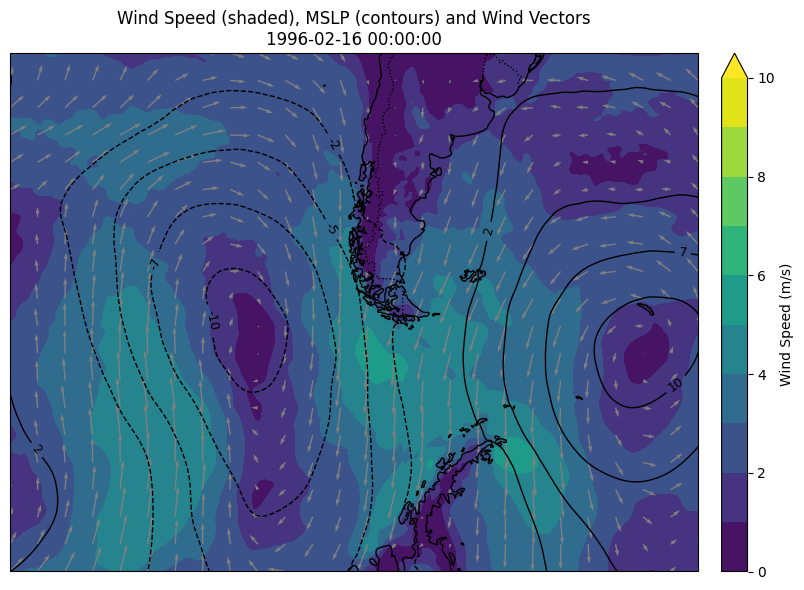

In [ ]:
# --- Subset and average data over time range ---
time_range = HWs_ARS_KJS['date'].to_list()
u_anom = U10_an.sel(time=time_range).mean('time').u10_anomaly
v_anom = V10_an.sel(time=time_range).mean('time').v10_anomaly
mslp_anom = mslp_an.sel(time=time_range).mean('time').msl_anomaly

# --- Compute wind speed ---
wind_speed = np.sqrt(u_anom**2 + v_anom**2)

# --- Define Mercator projection ---
proj = ccrs.Mercator()

# --- Create figure and axes ---
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': proj})

# --- Add geographic features ---
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Optional: set geographical extent
ax.set_extent([-120, -30, -70, -30], crs=ccrs.PlateCarree())

# --- Plot wind speed as color fill ---
levels_ws = np.arange(0, 11, 1)
cmap_ws = plt.get_cmap("viridis")
ws_plot = ax.contourf(
    wind_speed.longitude, wind_speed.latitude, wind_speed,
    levels=levels_ws,
    cmap=cmap_ws,
    extend='max',
    transform=ccrs.PlateCarree()
)
cbar = plt.colorbar(ws_plot, ax=ax, orientation='vertical', pad=0.02, label="Wind Speed (m/s)")

# --- Plot Z500 anomalies as black contours (dashed for negative, no zero line) ---
levels_z500 = [lev for lev in np.arange(-40, 41, 2.5) if lev != 0]  # Exclude zero
linestyles = ['dashed' if lev < 0 else 'solid' for lev in levels_z500]
contour = ax.contour(
    mslp_anom.longitude, mslp_anom.latitude, mslp_anom,
    levels=levels_z500,
    colors='black',
    linewidths=1.0,
    linestyles=linestyles,
    transform=ccrs.PlateCarree()
)
ax.clabel(contour, fmt='%d', fontsize=9)

# --- Plot wind vectors (thinned) ---
step = 5
ax.quiver(
    u_anom.longitude[::step], u_anom.latitude[::step],
    u_anom[::step, ::step], v_anom[::step, ::step],
    transform=ccrs.PlateCarree(), scale=100, width=0.0020, regrid_shape=20,
    color='grey'
)

# --- Title and layout ---
ax.set_title(f"Wind Speed (shaded), MSLP (contours) and Wind Vectors\n{date_start} to {date_end}")

fig.savefig(f"fig/WS_{events[1]}.pdf", dpi = 500, facecolor='w', bbox_inches = 'tight', pad_inches = 0.1)


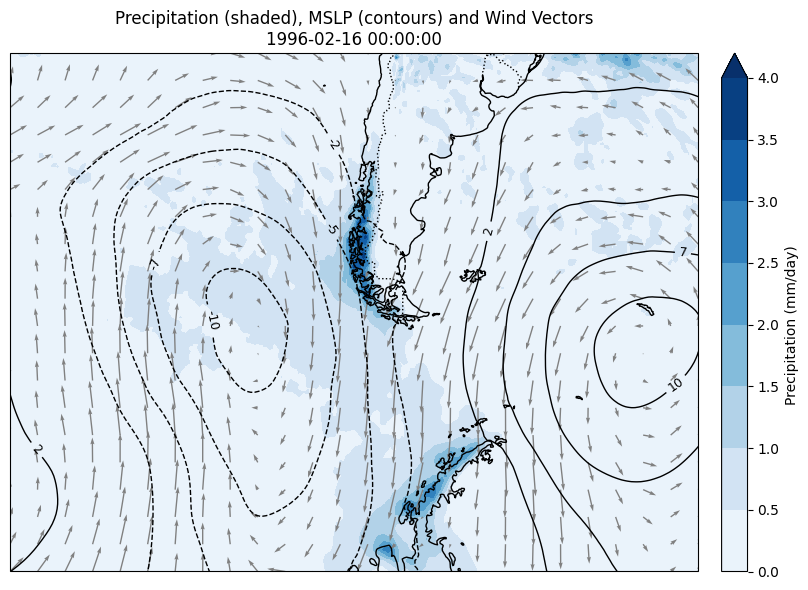

In [ ]:
# --- Subset and average data over time range ---
precip = PRECIP.sel(time=time_range).mean('time').tp_daily_sum  # Use .tp_anomaly se for anomalia
mslp_anom = mslp_an.sel(time=time_range).mean('time').msl_anomaly
u_anom = U10_an.sel(time=time_range).mean('time').u10_anomaly
v_anom = V10_an.sel(time=time_range).mean('time').v10_anomaly

# --- Define projection ---
proj = ccrs.Mercator()

# --- Create figure ---
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': proj})

# --- Add features ---
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# --- Set extent ---
ax.set_extent([-120, -30, -70, -30], crs=ccrs.PlateCarree())

# --- Plot precipitation (mm) ---
levels_precip = np.arange(0, 4.1, 0.5)
cmap_precip = plt.get_cmap("Blues")
precip_plot = ax.contourf(
    precip.longitude, precip.latitude, precip,  # Convert from m to mm
    levels=levels_precip,
    cmap=cmap_precip,
    extend='max',
    transform=ccrs.PlateCarree()
)
cbar = plt.colorbar(precip_plot, ax=ax, orientation='vertical', pad=0.02, label="Precipitation (mm/day)")

# --- Plot Z500 anomalies as black contours (dashed for negative, no zero line) ---
levels_z500 = [lev for lev in np.arange(-40, 41, 2.5) if lev != 0]  # Exclude zero
linestyles = ['dashed' if lev < 0 else 'solid' for lev in levels_z500]
contour = ax.contour(
    mslp_anom.longitude, mslp_anom.latitude, mslp_anom,
    levels=levels_z500,
    colors='black',
    linewidths=1.0,
    linestyles=linestyles,
    transform=ccrs.PlateCarree()
)
ax.clabel(contour, fmt='%d', fontsize=9)

# --- Plot wind vectors (thinned) ---
step = 5
ax.quiver(
    u_anom.longitude[::step], u_anom.latitude[::step],
    u_anom[::step, ::step], v_anom[::step, ::step],
    transform=ccrs.PlateCarree(), scale=100, width=0.0020, regrid_shape=20,
    color='grey'
)

# --- Title ---
ax.set_title(f"Precipitation (shaded), MSLP (contours) and Wind Vectors\n{date_start} to {date_end}")

fig.savefig(f"fig/RRR_{events[1]}.pdf", dpi = 500, facecolor='w', bbox_inches = 'tight', pad_inches = 0.1)


/tmp/ipykernel_337125/3471179812.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


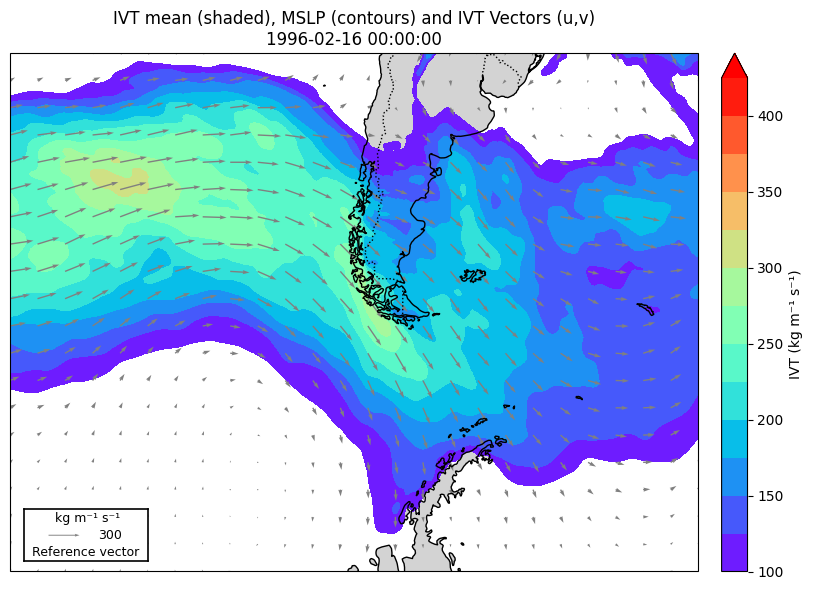

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# --- Subset and average data over time range ---
IVTv_sel = IVTv.sel(time=time_range).mean('time').viwvn_12UTC
IVTu_sel = IVTu.sel(time=time_range).mean('time').viwve_12UTC
Z500_anom = Z500_an.sel(time=time_range).mean('time').z_anomaly[0]


# --- Compute wind speed ---
IVT = np.sqrt(IVTu_sel**2 + IVTv_sel**2)

# --- Define projection ---
proj = ccrs.Mercator()

# --- Create figure ---
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': proj})

# --- Add features ---
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# --- Set extent ---
ax.set_extent([-120, -30, -70, -30], crs=ccrs.PlateCarree())

# --- Plot precipitation (mm) ---
levels_precip = np.arange(100, 430, 25)
cmap_precip = plt.get_cmap("rainbow")
precip_plot = ax.contourf(
    IVT.longitude, IVT.latitude, IVT,  # Convert from m to mm
    levels=levels_precip,
    cmap=cmap_precip,
    extend='max',
    transform=ccrs.PlateCarree()
)
cbar = plt.colorbar(precip_plot, ax=ax, orientation='vertical', pad=0.02, label="IVT (kg m⁻¹ s⁻¹)")

# --- Plot wind vectors (thinned) ---
step = 5

ref_value = 300  # reference vector value

# Draw the main vector field
Q = ax.quiver(
    IVTu_sel.longitude[::step], IVTu_sel.latitude[::step],
    IVTu_sel[::step, ::step], IVTv_sel[::step, ::step],
    transform=ccrs.PlateCarree(), scale=7500, width=0.0020,
    regrid_shape=20, color='grey'
)

# Create a small inset area inside the main axes
ax_inset = inset_axes(ax, width="18%", height="10%", loc='lower left',
                      bbox_to_anchor=(0.02, 0.02, 1, 1),
                      bbox_transform=ax.transAxes, borderpad=0)

# Set white background and black border for the inset box
ax_inset.set_facecolor('white')
for spine in ax_inset.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)

# Remove ticks and unnecessary borders
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_xlim(0, 1)
ax_inset.set_ylim(0, 1)

# Add the reference arrow inside the inset box
qk = ax_inset.quiver(
    0.2, 0.5, 1, 0, angles='xy', scale_units='xy', scale=4,
    color='grey'
)

# Add the numeric value (e.g., 300) next to the arrow
ax_inset.text(0.25, 0.825, 'kg m⁻¹ s⁻¹', va='center', fontsize=9)

# Add the numeric value (e.g., 300) next to the arrow
ax_inset.text(0.6, 0.5, f'{ref_value}', va='center', fontsize=9)

# Add the label below the arrow
ax_inset.text(0.5, 0.1, 'Reference vector', ha='center', fontsize=9)

# Ensure nothing outside the box is clipped
ax_inset.set_clip_on(False)

# --- Title ---
ax.set_title(f"IVT mean (shaded), MSLP (contours) and IVT Vectors (u,v)\n{date_start} to {date_end}")

fig.savefig(f"fig/IVT_{events[1]}.pdf", dpi = 500, facecolor='w', bbox_inches = 'tight', pad_inches = 0.1)


In [10]:
filename = 'data/HW_ARs_SSI_new.csv'
HWs_ARS_KJS_just = pd.read_csv(filename, sep= '\t')
HWs_ARS_KJS_just['date'] = pd.to_datetime(HWs_ARS_KJS['date'])
HWs_ARS_KJS_just

,date,temperature,p90_har,heatwave,label,ARs_bin
0,1996-02-16,5.3,3.246030,True,1,6
1,1996-02-17,5.6,3.237139,True,1,332
2,1996-02-18,5.1,3.093747,True,15,96
3,1996-02-19,1.6,1.010791,True,41,208
4,1996-02-20,3.5,3.254920,True,44,316
5,1997-01-20,4.0,1.878726,True,58,154
6,1997-01-21,5.4,2.462018,True,74,101
7,1997-01-22,3.2,3.074079,True,77,10
8,1997-01-23,6.9,3.093747,True,77,51


In [11]:
AR_shape = xr.open_dataset('data/ARs_vLHT_HW_SSI.nc')
AR_shape

<xarray.Dataset> Size: 2MB
Dimensions:          (time: 9, lat: 91, lon: 241)
Coordinates:
  * time             (time) datetime64[ns] 72B 1996-02-18 ... 2006-01-22
  * lat              (lat) float32 364B -30.0 -30.5 -31.0 ... -74.0 -74.5 -75.0
  * lon              (lon) float32 964B -150.0 -149.5 -149.0 ... -30.5 -30.0
Data variables:
    enar_binary_tag  (time, lat, lon) int64 2MB ...
Attributes:
    description:  Binary indicator of energy atmospheric river using vLHT ERA-5
    credits:      Developed by V. Buffet, B. Pohl and V. Favier from Wille et...

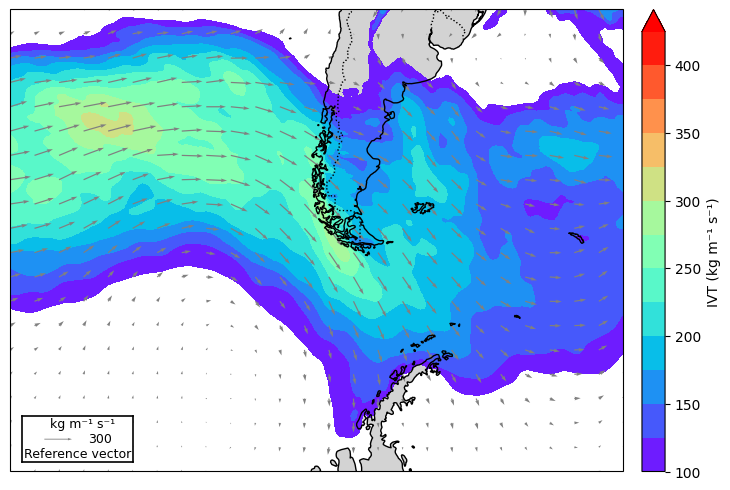

In [12]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# --- Subset and average data over time range ---
IVTv_sel = IVTv.sel(time=time_range).mean('time').viwvn_12UTC
IVTu_sel = IVTu.sel(time=time_range).mean('time').viwve_12UTC
Z500_anom = Z500_an.sel(time=time_range).mean('time').z_anomaly[0]


# --- Compute wind speed ---
IVT = np.sqrt(IVTu_sel**2 + IVTv_sel**2)

# --- Define projection ---
proj = ccrs.Mercator()

# --- Create figure ---
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': proj})

# --- Add features ---
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# --- Set extent ---
ax.set_extent([-120, -30, -70, -30], crs=ccrs.PlateCarree())

# --- Plot precipitation (mm) ---
levels_precip = np.arange(100, 430, 25)
cmap_precip = plt.get_cmap("rainbow")
precip_plot = ax.contourf(
    IVT.longitude, IVT.latitude, IVT,  # Convert from m to mm
    levels=levels_precip,
    cmap=cmap_precip,
    extend='max',
    transform=ccrs.PlateCarree()
)
cbar = plt.colorbar(precip_plot, ax=ax, orientation='vertical', pad=0.02, label="IVT (kg m⁻¹ s⁻¹)")

# --- Plot wind vectors (thinned) ---
step = 5

ref_value = 300  # reference vector value

# Draw the main vector field
Q = ax.quiver(
    IVTu_sel.longitude[::step], IVTu_sel.latitude[::step],
    IVTu_sel[::step, ::step], IVTv_sel[::step, ::step],
    transform=ccrs.PlateCarree(), scale=7500, width=0.0020,
    regrid_shape=20, color='grey'
)

# Create a small inset area inside the main axes
ax_inset = inset_axes(ax, width="18%", height="10%", loc='lower left',
                      bbox_to_anchor=(0.02, 0.02, 1, 1),
                      bbox_transform=ax.transAxes, borderpad=0)

# Set white background and black border for the inset box
ax_inset.set_facecolor('white')
for spine in ax_inset.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)

# Remove ticks and unnecessary borders
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_xlim(0, 1)
ax_inset.set_ylim(0, 1)

# Add the reference arrow inside the inset box
qk = ax_inset.quiver(
    0.2, 0.5, 1, 0, angles='xy', scale_units='xy', scale=4,
    color='grey'
)

# Add the numeric value (e.g., 300) next to the arrow
ax_inset.text(0.25, 0.825, 'kg m⁻¹ s⁻¹', va='center', fontsize=9)

# Add the numeric value (e.g., 300) next to the arrow
ax_inset.text(0.6, 0.5, f'{ref_value}', va='center', fontsize=9)

# Add the label below the arrow
ax_inset.text(0.5, 0.1, 'Reference vector', ha='center', fontsize=9)

# Ensure nothing outside the box is clipped
ax_inset.set_clip_on(False)

#ax.contour(AR_shape.lon, AR_shape.lat, AR_shape.enar_binary_tag[1], levels=[0.5], colors='magenta', linewidths=2, transform=ccrs.PlateCarree())


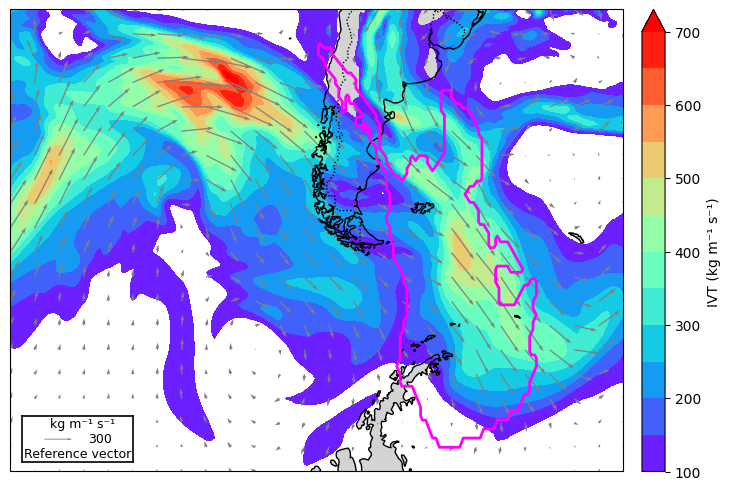

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# --- Subset and average data over time range ---
time_range = HWs_ARS_KJS_just['date'][1]
IVTv_sel = IVTv.sel(time=time_range, method='nearest').viwvn_12UTC
IVTu_sel = IVTu.sel(time=time_range, method='nearest').viwve_12UTC
Z500_anom = Z500_an.sel(time=time_range).z_anomaly[0]


# --- Compute wind speed ---
IVT = np.sqrt(IVTu_sel**2 + IVTv_sel**2)

# --- Define projection ---
proj = ccrs.Mercator()

# --- Create figure ---
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': proj})

# --- Add features ---
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# --- Set extent ---
ax.set_extent([-120, -30, -70, -30], crs=ccrs.PlateCarree())

# --- Plot precipitation (mm) ---
levels_precip = np.arange(100, 750, 50)
cmap_precip = plt.get_cmap("rainbow")
precip_plot = ax.contourf(
    IVT.longitude, IVT.latitude, IVT,  # Convert from m to mm
    levels=levels_precip,
    cmap=cmap_precip,
    extend='max',
    transform=ccrs.PlateCarree()
)
cbar = plt.colorbar(precip_plot, ax=ax, orientation='vertical', pad=0.02, label="IVT (kg m⁻¹ s⁻¹)")

# --- Plot wind vectors (thinned) ---
step = 5

ref_value = 300  # reference vector value

# Draw the main vector field
Q = ax.quiver(
    IVTu_sel.longitude[::step], IVTu_sel.latitude[::step],
    IVTu_sel[::step, ::step], IVTv_sel[::step, ::step],
    transform=ccrs.PlateCarree(), scale=7500, width=0.0020,
    regrid_shape=20, color='grey'
)

# Create a small inset area inside the main axes
ax_inset = inset_axes(ax, width="18%", height="10%", loc='lower left',
                      bbox_to_anchor=(0.02, 0.02, 1, 1),
                      bbox_transform=ax.transAxes, borderpad=0)

# Set white background and black border for the inset box
ax_inset.set_facecolor('white')
for spine in ax_inset.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)

# Remove ticks and unnecessary borders
ax_inset.set_xticks([])
ax_inset.set_yticks([])
ax_inset.set_xlim(0, 1)
ax_inset.set_ylim(0, 1)

# Add the reference arrow inside the inset box
qk = ax_inset.quiver(
    0.2, 0.5, 1, 0, angles='xy', scale_units='xy', scale=4,
    color='grey'
)

# Add the numeric value (e.g., 300) next to the arrow
ax_inset.text(0.25, 0.825, 'kg m⁻¹ s⁻¹', va='center', fontsize=9)

# Add the numeric value (e.g., 300) next to the arrow
ax_inset.text(0.6, 0.5, f'{ref_value}', va='center', fontsize=9)

# Add the label below the arrow
ax_inset.text(0.5, 0.1, 'Reference vector', ha='center', fontsize=9)

# Ensure nothing outside the box is clipped
ax_inset.set_clip_on(False)

ax.contour(AR_shape.lon, AR_shape.lat, AR_shape.enar_binary_tag[1], levels=[0.5], colors='magenta', linewidths=2, transform=ccrs.PlateCarree())
